In [9]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import string

In [2]:
ROOT_PATH = Path().absolute().parent

PosixPath('/home/ingrid/Documents/TDT4900-Master-Thesis')

In [3]:
data_path = ROOT_PATH.joinpath('data')

In [4]:
# flickr8k
f8_path = data_path.joinpath('interim', 'Flickr8k', 'Flickr8k_train.csv')
#flick30k
f30_path = data_path.joinpath('interim', 'karpathy_split', 'flickr30k_train.csv')
#MSCOCO
coco_path = data_path.joinpath('interim', 'MSCOCO', 'coco_train.csv')

In [5]:
f8_df = pd.read_csv(f8_path)
f30_df = pd.read_csv(f30_path)

In [6]:
f8_df

,Unnamed: 0,Unnamed: 0.1,image_id,caption_id,caption
0,0,0,1000268201_693b08cb0e.jpg,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1,1,1000268201_693b08cb0e.jpg,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
2,2,2,1000268201_693b08cb0e.jpg,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
3,3,3,1000268201_693b08cb0e.jpg,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
4,4,4,1000268201_693b08cb0e.jpg,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...
...,...,...,...,...,...
29995,40450,40450,997338199_7343367d7f.jpg,997338199_7343367d7f.jpg#0,A person stands near golden walls .
29996,40451,40451,997338199_7343367d7f.jpg,997338199_7343367d7f.jpg#1,a woman behind a scrolled wall is writing
29997,40452,40452,997338199_7343367d7f.jpg,997338199_7343367d7f.jpg#2,A woman standing near a decorated wall writes .
29998,40453,40453,997338199_7343367d7f.jpg,997338199_7343367d7f.jpg#3,The walls are covered in gold and patterns .


In [7]:
f8_captions = f8_df.loc[:, ['image_id', 'caption']]


In [12]:
table = str.maketrans('', '', string.punctuation)

In [18]:
def word_frequency_dict(df):
    d = {}
    for c in df.loc[:, 'caption']:
        c = [w.strip() for w in c.split()]
        c = [w.lower() for w in c]
        c = [w.translate(table) for w in c]
        c = [w for w in c if len(w) > 1 or w == 'a']
        c = [w for w in c if w.isalpha()]

        for w in c:
            if w not in d.keys():
                d[w] = 1
            else:
                d[w] += 1
    return d
    

In [29]:
def find_k_most_frequent(wf_d, k=25):
    ws = []
    fs = []
    least_frequent_w = ''
    lf_f = 1000000
    for word, f in wf_d.items():
        if len(ws) < k:
            ws.append(word)
            fs.append(f)
            if f < lf_f:
                least_frequent_w = word
                lf_f = f
        else:
            # must replace the k most frequent word
            if f > lf_f:
                # is top k
                ws.remove(least_frequent_w)
                fs.remove(lf_f)
                ws.append(word)
                fs.append(f)
                lf_f = min(fs)
                for w_ in ws:
                    if wf_d[w_] == lf_f:
                        least_frequent_w = w_
                        break
    wf_d_out = {w: f for w, f in wf_d.items() if w in set(ws)}
    return wf_d_out

In [30]:
# wordfrequency in f8 overall
wf8_d = word_frequency_dict(f8_captions)
wf8_25f = find_k_most_frequent(wf8_d, 25)
print(wf8_25f)

{'a': 46781, 'in': 14085, 'is': 6907, 'of': 4967, 'girl': 2414, 'the': 13509, 'to': 2303, 'black': 2854, 'dog': 6159, 'and': 6672, 'are': 2619, 'with': 5763, 'on': 8006, 'white': 2921, 'brown': 1995, 'at': 2101, 'two': 4246, 'young': 1976, 'man': 5374, 'wearing': 2271, 'red': 1976, 'water': 2024, 'boy': 2634, 'people': 2093, 'woman': 2543}


In [31]:
f8_labels = [key for key in wf8_25f.keys()]
f8_values = [wf8_25f[key] for key in wf8_25f.keys()]

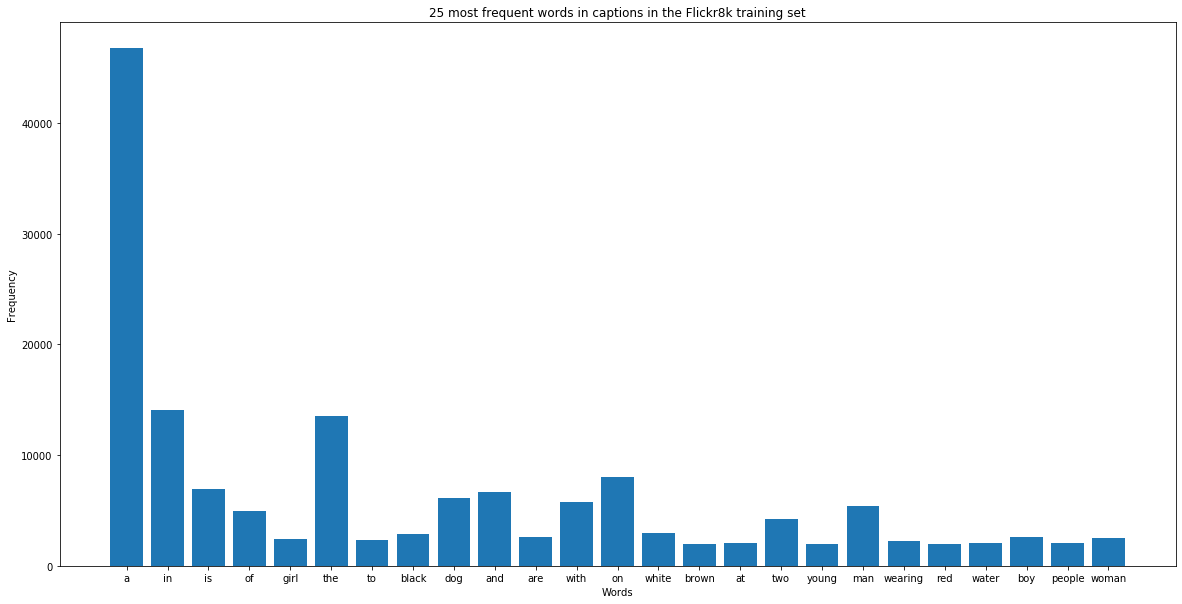

In [37]:
plt.figure(figsize=(20,10))
plt.bar(f8_labels, f8_values)
plt.title("25 most frequent words in captions in the Flickr8k training set")
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

In [38]:
# wordfrequency in f30 overall
wf30_d = word_frequency_dict(f30_df)
wf30_25f = find_k_most_frequent(wf30_d, 25)
print(wf30_25f)

{'two': 19599, 'young': 12023, 'with': 33168, 'at': 14888, 'while': 10749, 'in': 76202, 'the': 57271, 'white': 11978, 'are': 18439, 'a': 248221, 'man': 38831, 'blue': 10334, 'shirt': 11929, 'on': 41580, 'of': 35571, 'wearing': 14319, 'is': 37659, 'an': 14591, 'to': 16126, 'and': 40420, 'black': 11185, 'people': 15888, 'his': 10481, 'woman': 20145, 'red': 9065}


In [39]:
f30_labels = [key for key in wf30_25f.keys()]
f30_values = [wf30_25f[key] for key in wf30_25f.keys()]

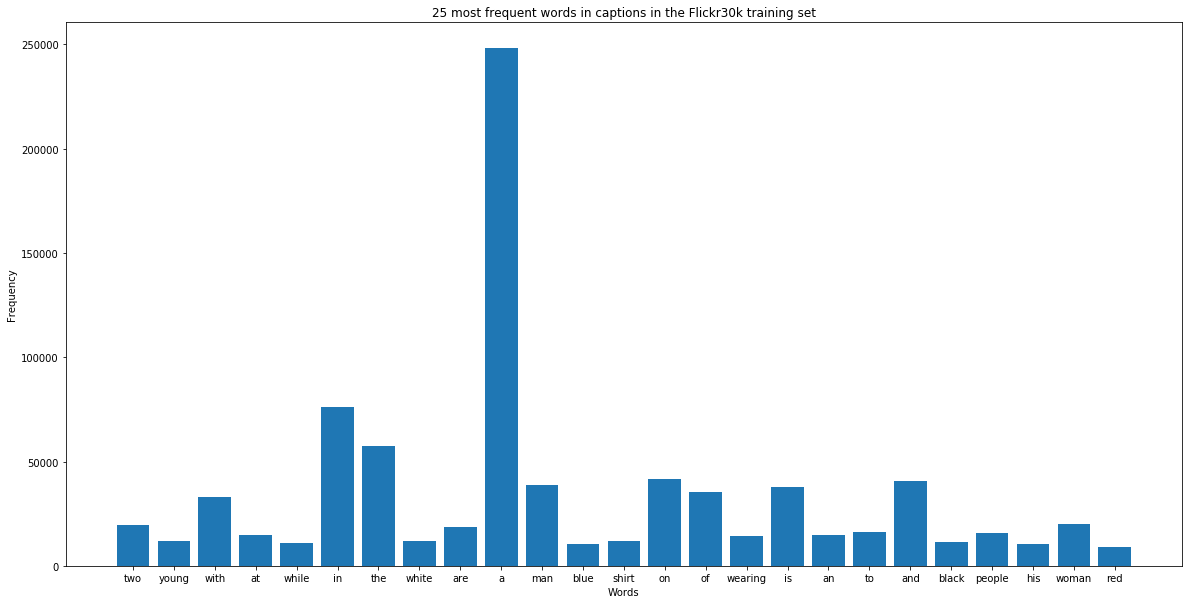

In [40]:
plt.figure(figsize=(20,10))
plt.bar(f30_labels, f30_values)
plt.title("25 most frequent words in captions in the Flickr30k training set")
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()